In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler



In [77]:
dataframe = pd.read_csv('cinemaTicket_Ref.csv')

# **Exploratory Data Analysis (EDA)**

*In this section, we will conduct Exploratory Data Analysis (EDA) on the Cinema Tickets dataset, which covers eight months in 2018. This dataset includes sales history and screening details from various cinemas, with anonymized locations. The goal of our EDA is to uncover patterns, trends, and insights that can inform predictive modeling and strategic decision-making in the cinema industry.*

*The key objectives of our EDA are as follows:*
1. **Understand the distribution and trends of ticket sales over time.**
2. **Analyze the impact of various factors, such as screening times, days of the week, and movie genres, on sales.**
3. **Identify potential clusters of cinemas based on sales and screening patterns.**
4. **Explore the relationship between cast, crew, and movie success metrics.**

*By analyzing this data, we aim to provide actionable insights that can aid in cinema clustering, sales forecasting, movie genre recommendations, and optimization of screening schedules. Additionally, as new movie data becomes available, this analysis will evolve to support more refined decision-making processes in the cinema industry.*


In [78]:
dataframe.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [79]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [80]:
dataframe['date'] = pd.to_datetime(dataframe['date'])

In [81]:
dataframe['year'] = pd.DatetimeIndex(dataframe['date']).year

In [82]:
dataframe['month'] = pd.DatetimeIndex(dataframe['date']).month


In [83]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   film_code     142524 non-null  int64         
 1   cinema_code   142524 non-null  int64         
 2   total_sales   142524 non-null  int64         
 3   tickets_sold  142524 non-null  int64         
 4   tickets_out   142524 non-null  int64         
 5   show_time     142524 non-null  int64         
 6   occu_perc     142399 non-null  float64       
 7   ticket_price  142524 non-null  float64       
 8   ticket_use    142524 non-null  int64         
 9   capacity      142399 non-null  float64       
 10  date          142524 non-null  datetime64[ns]
 11  month         142524 non-null  int32         
 12  quarter       142524 non-null  int64         
 13  day           142524 non-null  int64         
 14  year          142524 non-null  int32         
dtypes: datetime64[ns]

In [84]:
dataframe.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
year              0
dtype: int64

In [85]:
dataframe.shape

(142524, 15)

In [86]:
dataframe.dropna(axis=0, inplace=True)

In [87]:
dataframe.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
year            0
dtype: int64

In [88]:
dataframe.shape

(142399, 15)

In [89]:
dataframe.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year
count,142399.000000,142399.000000,1.423990e+05,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399.000000,142399,142399.000000,142399.000000,142399.000000,142399.0
mean,1518.989298,320.372369,1.234773e+07,140.177080,0.237389,3.933883,19.965986,81243.435624,139.939691,854.723605,2018-07-09 16:47:22.806480640,6.777218,2.634864,16.112220,2018.0
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2018-02-21 00:00:00,2.000000,1.000000,1.000000,2018.0
25%,1485.000000,181.000000,1.280000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,2018-05-13 00:00:00,5.000000,2.000000,8.000000,2018.0
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79459.459459,50.000000,525.714286,2018-07-08 00:00:00,7.000000,3.000000,16.000000,2018.0
75%,1556.000000,474.000000,1.112000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,2018-09-02 00:00:00,9.000000,3.000000,24.000000,2018.0
max,1589.000000,566.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,2018-11-04 00:00:00,11.000000,4.000000,31.000000,2018.0
std,36.184162,159.650902,3.063471e+07,279.709174,2.924231,3.056853,22.653445,33237.373278,279.515104,953.118103,NaN,2.195050,0.809412,8.948638,0.0


In [90]:
dataframe.isnull()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142520,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142521,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
142522,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Data Visualization

Data visualization is a crucial step in data analysis that allows us to understand the underlying patterns, trends, and relationships within our data. In this section, we will explore various techniques and libraries for visualizing our data effectively.

## Objectives

- Understand the importance of data visualization.
- Learn how to use different Python libraries for creating visualizations.
- Explore various types of plots and charts.

## Libraries Used

- **Matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations in Python.
- **Seaborn**: A Python visualization library based on Matplotlib that provides a high-level interface for drawing attractive statistical graphics.
- **Pandas**: While primarily a data manipulation library, Pandas also includes some built-in visualization capabilities.

## Types of Visualizations

1. **Histograms**
2. **Bar Plots**
3. **Scatter Plots**
4. **Box Plots**
5. **Line Plo('Frequency', fontsize=14)
plt.show()


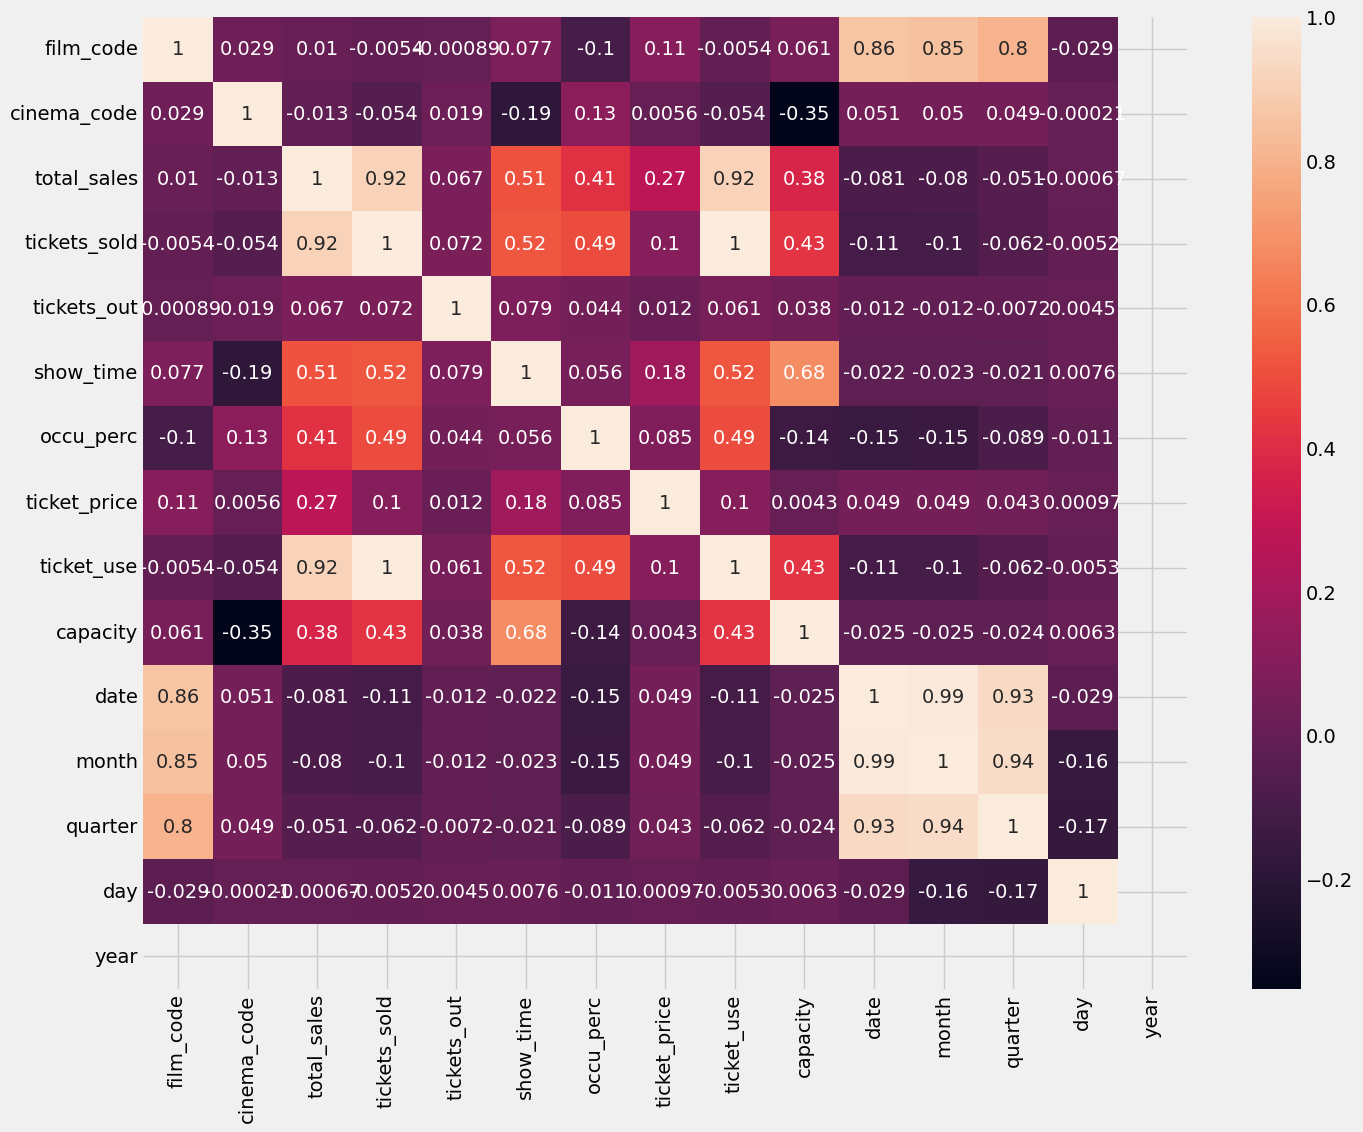

In [91]:
plt.figure(figsize=(15,12))
sb.heatmap(dataframe.corr(), annot=True)
plt.show()

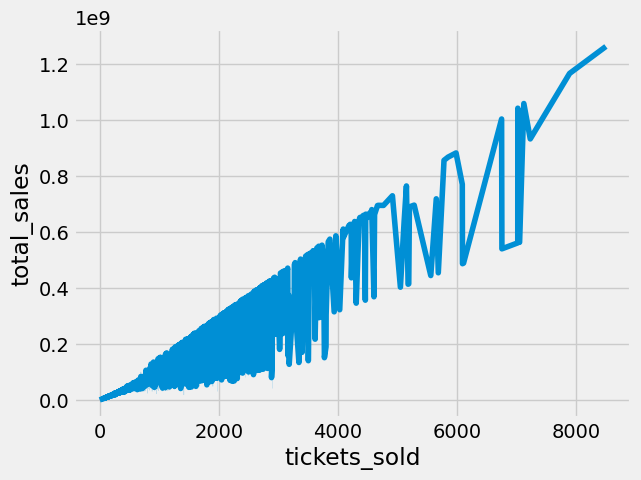

In [92]:
sb.lineplot(y=dataframe['total_sales'], x=dataframe['tickets_sold'])
plt.show()

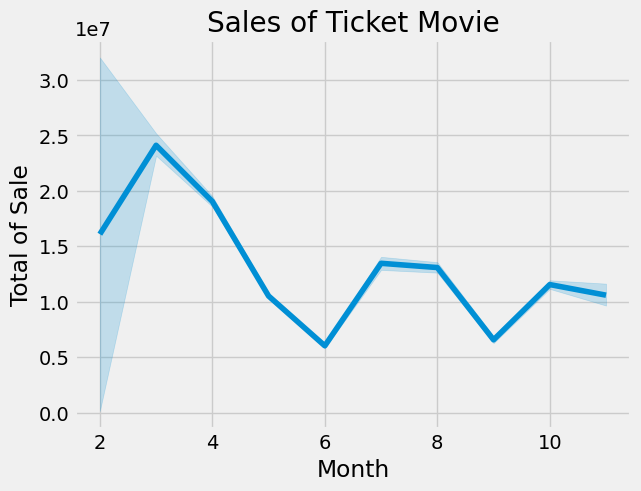

In [93]:
sb.lineplot(x=dataframe['month'], y=dataframe['total_sales'])
plt.title("Sales of Ticket Movie")
plt.xlabel("Month")
plt.ylabel("Total of Sale")
plt.show()

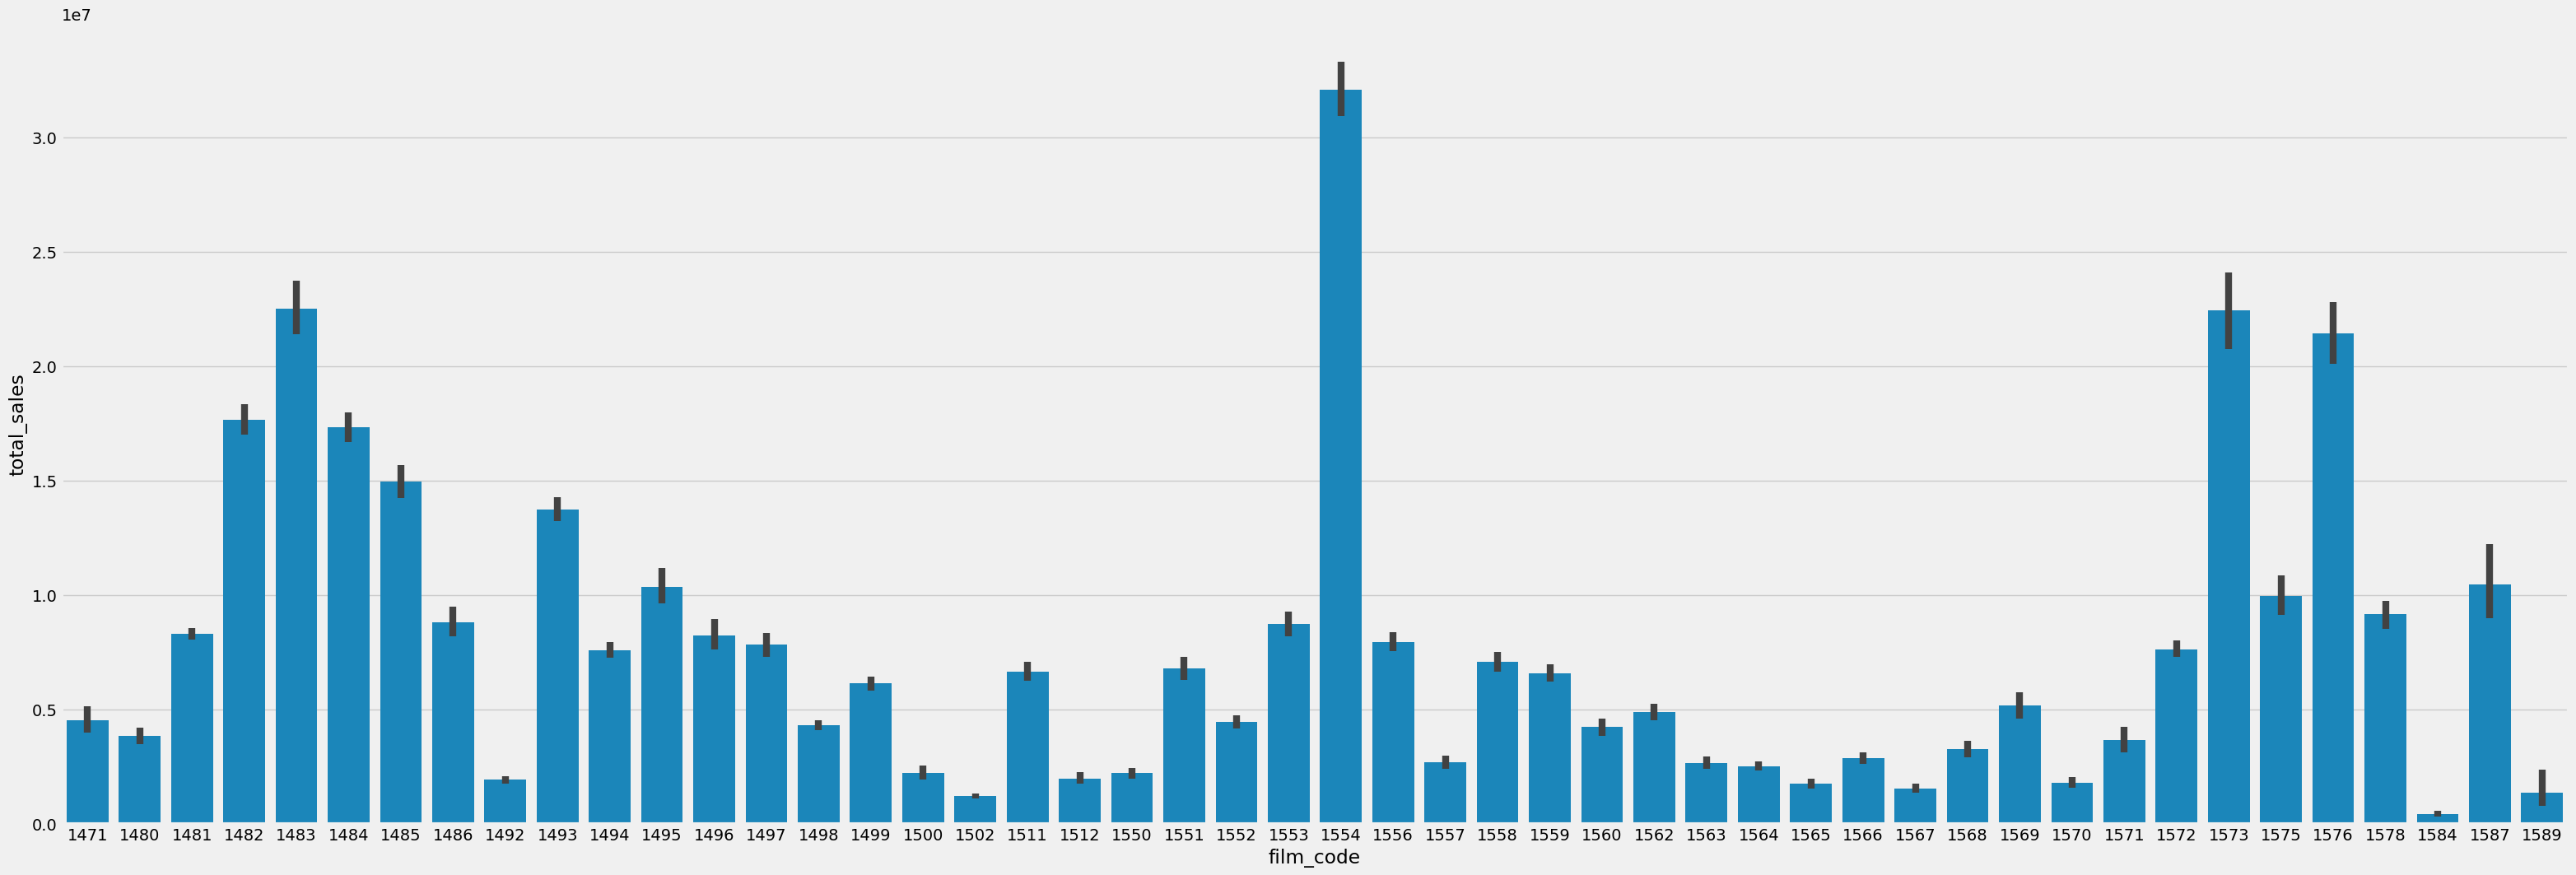

In [94]:
plt.figure(figsize=(35,12))
sb.barplot(x = dataframe['film_code'], y = dataframe['total_sales'])
plt.show()

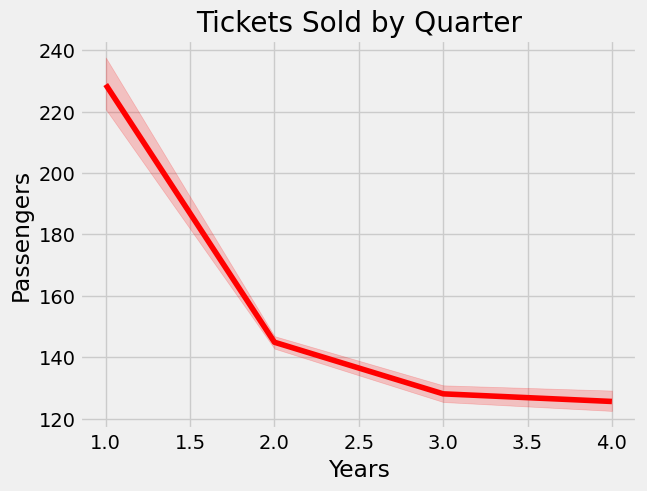

In [95]:
sb.lineplot(data=dataframe, x = "quarter", y="tickets_sold",color="r")
plt.title("Tickets Sold by Quarter")
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.show()

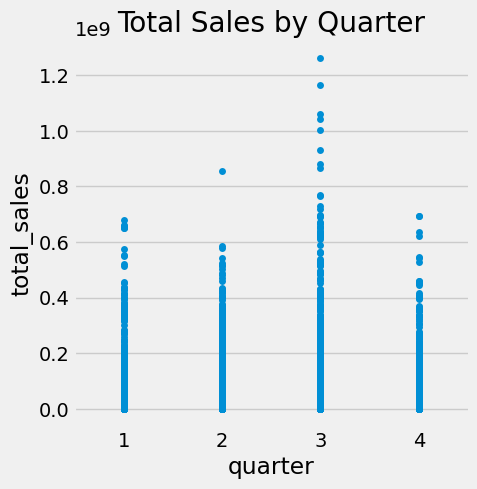

In [96]:
sb.catplot(x = "quarter", y="total_sales", data=dataframe, jitter=False)
plt.title("Total Sales by Quarter")
plt.show()

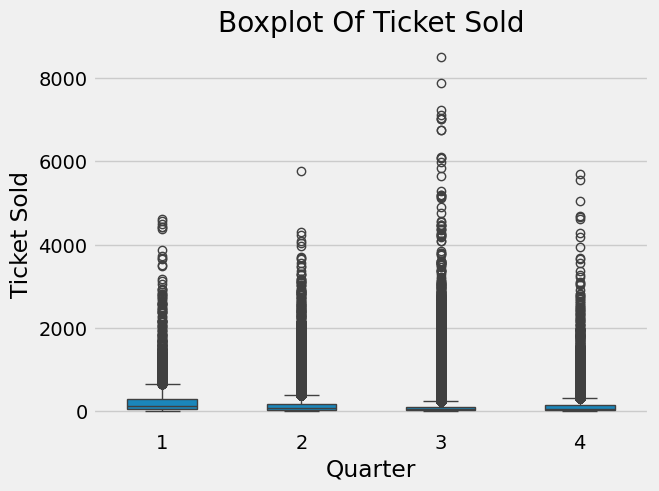

In [97]:
sb.boxplot(x=dataframe["quarter"], y=dataframe["tickets_sold"], width=0.5)
plt.title("Boxplot Of Ticket Sold")
plt.ylabel("Ticket Sold")
plt.xlabel("Quarter")
plt.show()

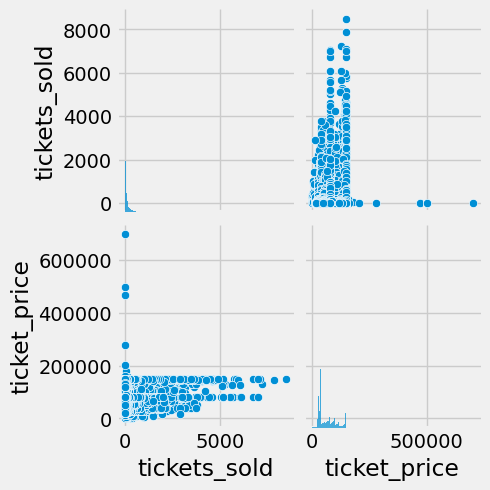

In [98]:
sb.pairplot(data=dataframe, vars=["tickets_sold", "ticket_price"])

plt.show()

<Axes: xlabel='date'>

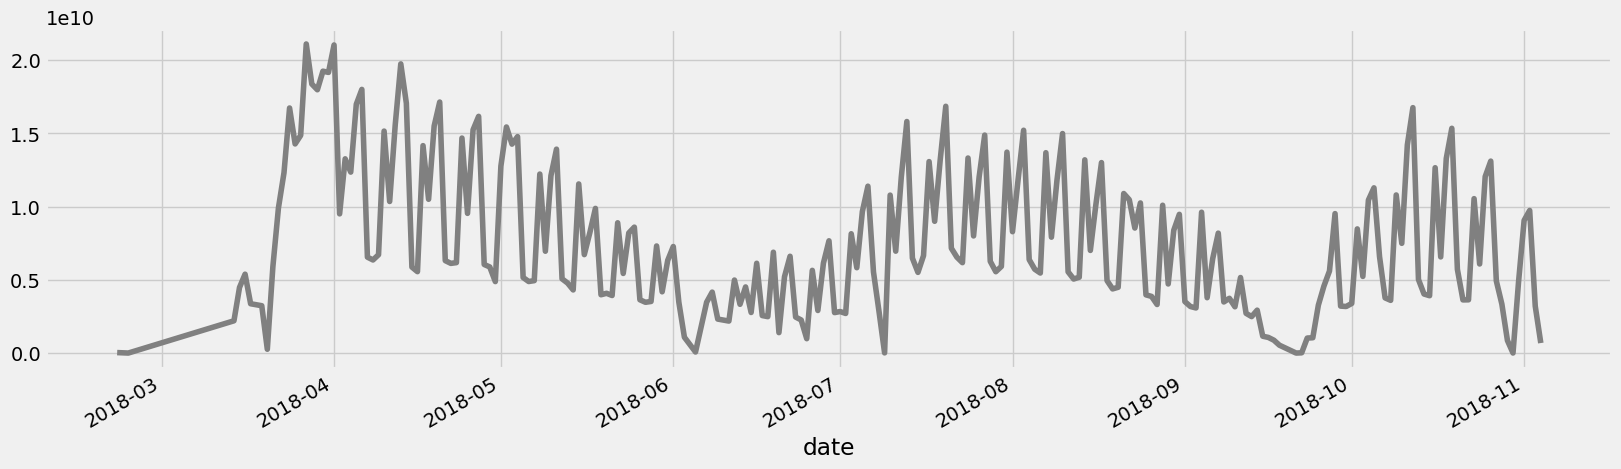

In [99]:
plt.style.use('fivethirtyeight')
dataframe.groupby('date')['total_sales'].sum().plot(figsize=(18,5), color='grey')

# Model Splitting and Evaluation

In [100]:
X = dataframe[['ticket_price', 'occu_perc', 'show_time', 'tickets_sold','ticket_use','capacity']]
Y = dataframe['total_sales']

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=40)

In [102]:
linear_reg_model = LinearRegression()

In [103]:
linear_reg_model.fit(X_train, Y_train)

LinearRegression()

In [105]:
predict = linear_reg_model.predict(X_test)

In [108]:
r_squared = r2_score(Y_test, predict)
r_squared

0.8699063424122462

In [109]:
ridge_model = Ridge(alpha=0.1)

In [110]:
ridge_model.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [111]:
r_predict = ridge_model.predict(X_test)
r_predict

array([ 6509685.0285806 , -6357132.29962791, -2666799.90217919, ...,
        -583412.28990719,  8243551.15490058, 22241734.71573017])

In [115]:
ridge_mse = mean_squared_error(Y_test, r_predict)
print(f'Ridge Mean Squared Error: {ridge_mse}')

Ridge Mean Squared Error: 132194438972054.52
